In [17]:
# Bibliotecas necessárias
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib notebook

<IPython.core.display.Javascript object>


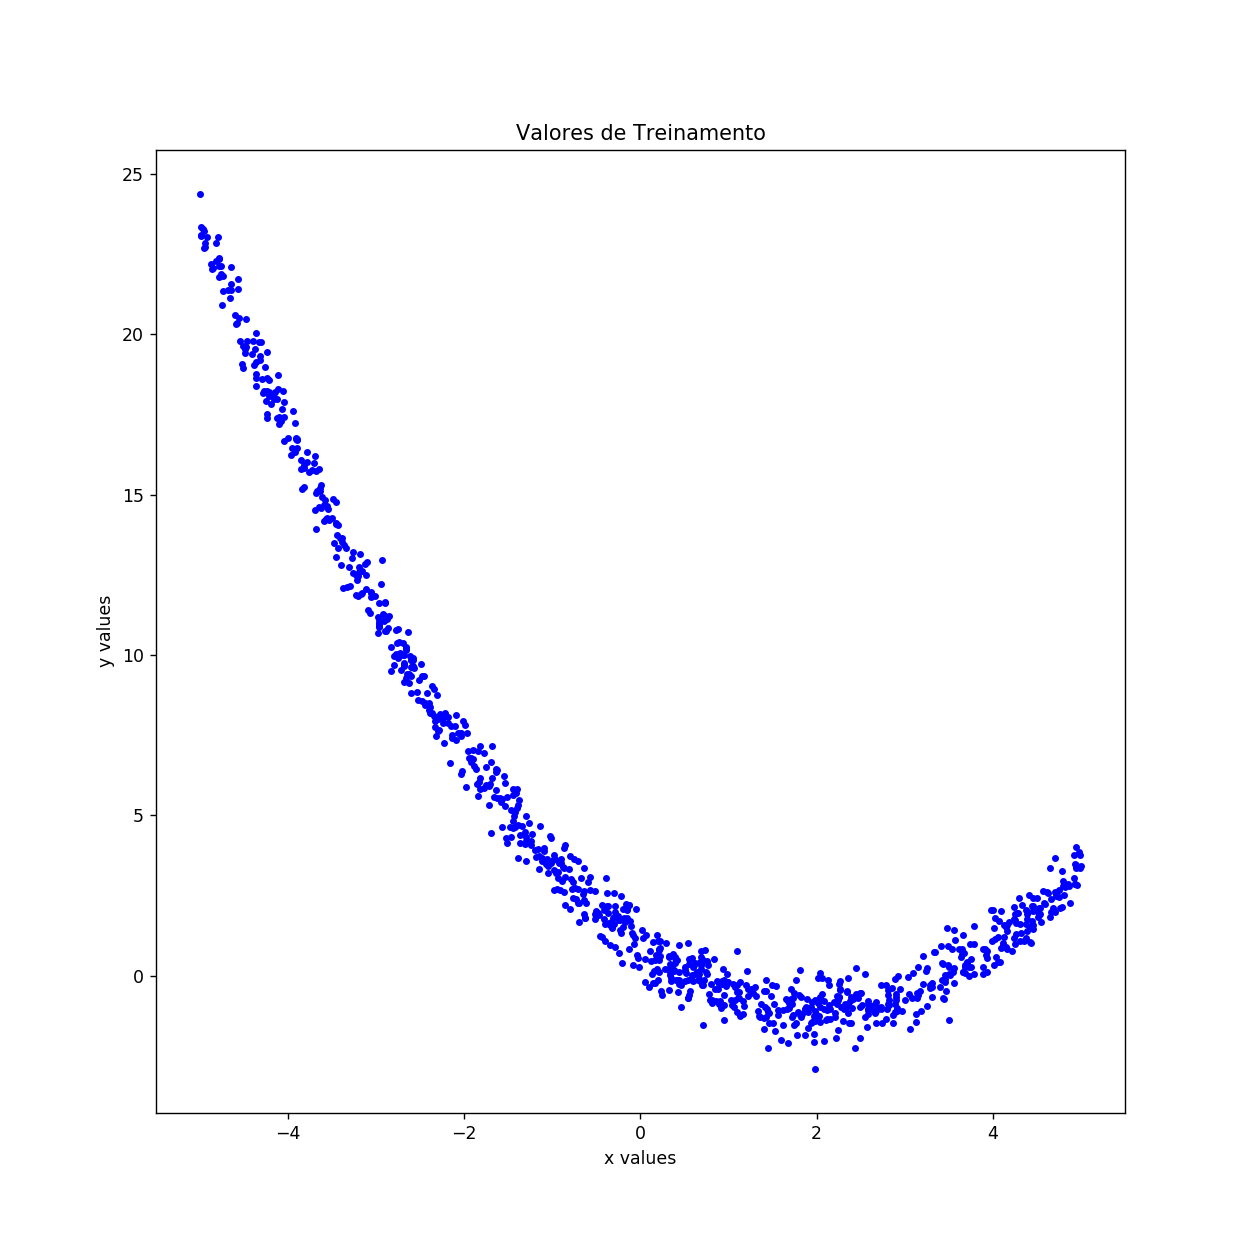

Text(0.5, 1.0, 'Valores de Treinamento')

In [18]:
# Abertura de código adjacente sem instruções

df = pd.read_csv('training.csv', header=None)
x_l = df[0].to_numpy()
y_l = df[1].to_numpy()

arr1 = [x_l]
arr2 = [y_l]
x = np.transpose(arr1)
y = np.transpose(arr2)
 
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Valores de Treinamento')

In [19]:
M = 1000 #vetor coluna com 1000 valores

np.random.seed(1234)

X = np.c_[np.ones((M, 1)), x]

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0] + a_opt[1, 0]*x
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2))

In [20]:

alpha = 0.1

n_iterations = 10000 

a = np.zeros((2,1))
a[0] = -10;
a[1] = -10;

Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

iteration = 0

while iteration < n_iterations:
    gradients = -2/M * X.T.dot(y - X.dot(a))
    
    a = a - alpha * gradients
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
   
    iteration = iteration + 1

In [21]:
# Sequência para verificar os resultados encontrados
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))

print('a0_gd: ' + str(a[0, 0]))
print('a1_gd: ' + str(a[1, 0]))

a0_opt: 4.939361968021297
a1_opt: -1.9593032431040314
a0_gd: 4.939361968021295
a1_gd: -1.9593032431040303


<IPython.core.display.Javascript object>


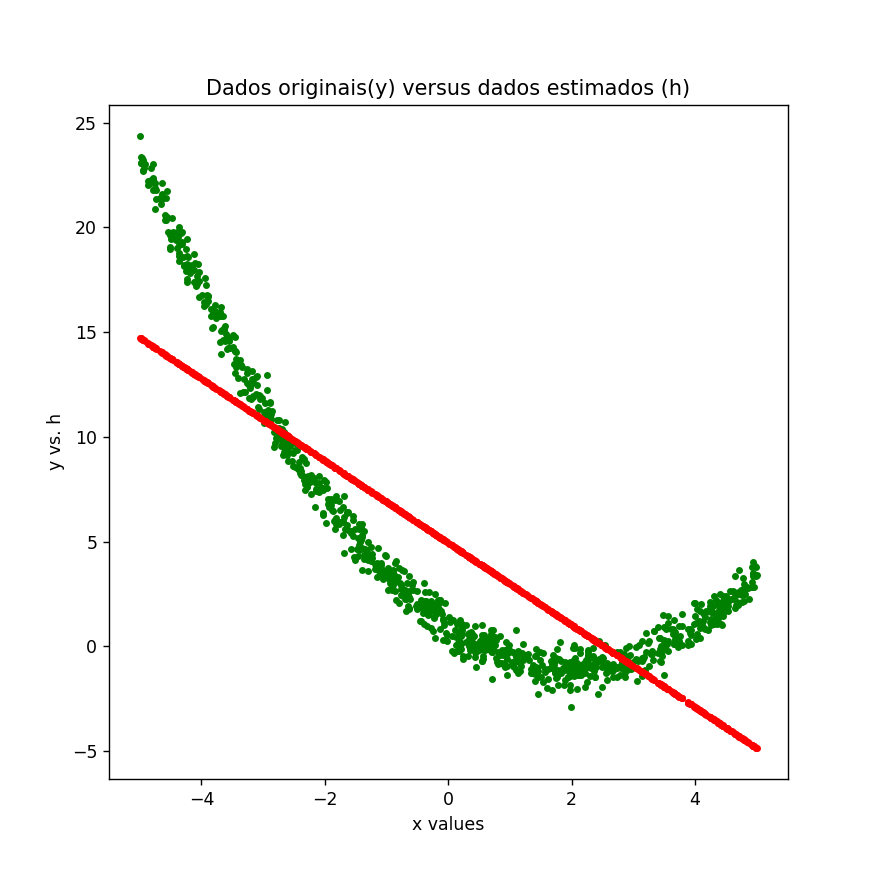

In [22]:
# Sequência de plotagem
fig = plt.figure(figsize=(7,7))
plt.plot(x, y, 'g.')
plt.plot(x, yhat , 'r.')
plt.xlabel('x values')
plt.ylabel('y vs. h')
plt.title('Dados originais(y) versus dados estimados (h)')
plt.show()

<IPython.core.display.Javascript object>


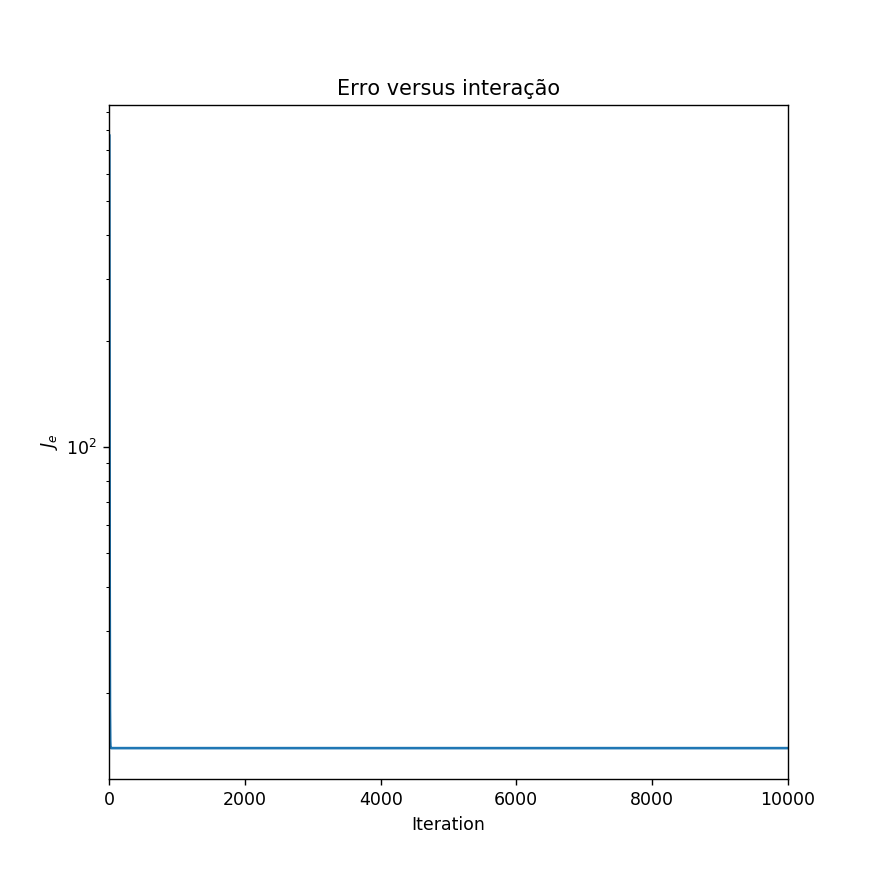

In [23]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Erro versus interação')
plt.show()
plt.savefig("Erro_versus_interação_Item7a.png", dpi=600)